# Import Libraries and Load Data


In [1]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and Explore Data


In [2]:
df = pd.read_csv('patient_readmission.csv')

# Data Preprocessing


In [3]:
X = df.drop(['Patient_ID', 'Readmitted',
            'Admission_Date', 'Discharge_Date'], axis=1)
y = df['Readmitted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training


In [4]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

# Model Evaluation


In [5]:
y_pred = logistic_model.predict(X_test_scaled)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.67      0.58        96
           1       0.57      0.40      0.47       104

    accuracy                           0.53       200
   macro avg       0.54      0.54      0.52       200
weighted avg       0.54      0.53      0.52       200

Confusion Matrix:
[[64 32]
 [62 42]]


# Visualizations


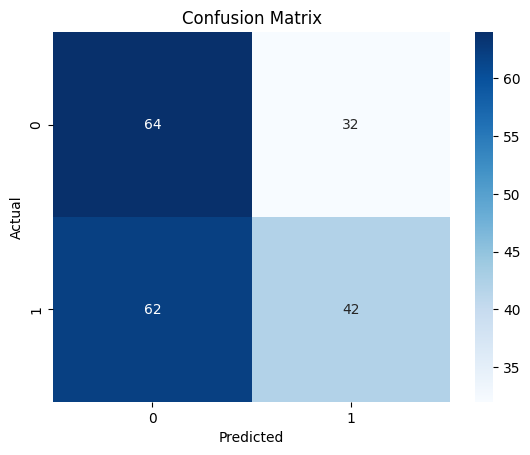

In [6]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()